# Travel Aggregator Analysis (Dennis Kinoti Gikunda)

In [1]:
import pandas as pd #For data manipulation, cleaning, and preprocessing tasks.
import numpy as np #For numerical operations and array manipulation.
import matplotlib.pyplot as plt #For creating visualizations and plots.
import seaborn as sns #For creating statistical visualizations and enhancing the aesthetics of plots.

In [2]:
# Load the dataset
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')

In [4]:
bookings.head(6)

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
5,customer_99,booking_241,Gurgaon,India,Roissy-en-France,France,2021-04-13T16:12:34Z,IOS,21843.20,GOIBIBO,1.0,11.0,6570.4


In [5]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB


In [6]:
sessions.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


In [7]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB


### Q1. Find the number of distinct bookings, sessions, and searches from the given data sets

In [9]:
distinct_bookings = bookings['booking_id'].nunique()
distinct_sessions = sessions['session_id'].nunique()
distinct_searches = sessions['search_id'].nunique()

print("Number of distinct bookings:", distinct_bookings)
print("Number of distinct sessions:", distinct_sessions)
print("Number of distinct searches:", distinct_searches)

Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


The figures show: 339 distinct bookings made. 331 distinct sessions recorded. 1360 distinct search activities performed.

Interpretation: More bookings than sessions, implying multiple bookings per session. Higher number of searches compared to bookings and sessions, suggesting users explore options extensively before booking.

### Q2. How many sessions have more than one booking?

In [10]:
# Merge bookings and sessions DataFrames to associate each booking with a session
merged_df = pd.merge(bookings, sessions, on='booking_id', how='left')

# Group merged DataFrame by session_id and count the number of unique booking_ids
session_booking_counts = merged_df.groupby('session_id')['booking_id'].nunique()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1]

# Count the number of sessions with more than one booking
num_sessions_with_multiple_bookings = len(sessions_with_multiple_bookings)

# Print the result
print("Number of sessions with more than one booking:", num_sessions_with_multiple_bookings)

Number of sessions with more than one booking: 10


### Q3.a. Which days of the week have the highest number of bookings? 

In [14]:
# Convert booking_time to datetime format
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Extract day of the week
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()

# Count number of bookings for each day of the week
daily_bookings_count = bookings['day_of_week'].value_counts()

# Find the day(s) with the highest number of bookings
max_bookings_day = daily_bookings_count.idxmax()
max_bookings_count = daily_bookings_count.max()

# Print the day(s) with the highest number of bookings
print("Day of the week with the highest number of bookings:", max_bookings_day)
print("Number of bookings on the busiest day:", max_bookings_count)

Day of the week with the highest number of bookings: Thursday
Number of bookings on the busiest day: 65


### Q3.b. Draw a pie chart to show the distribution for all days of the week

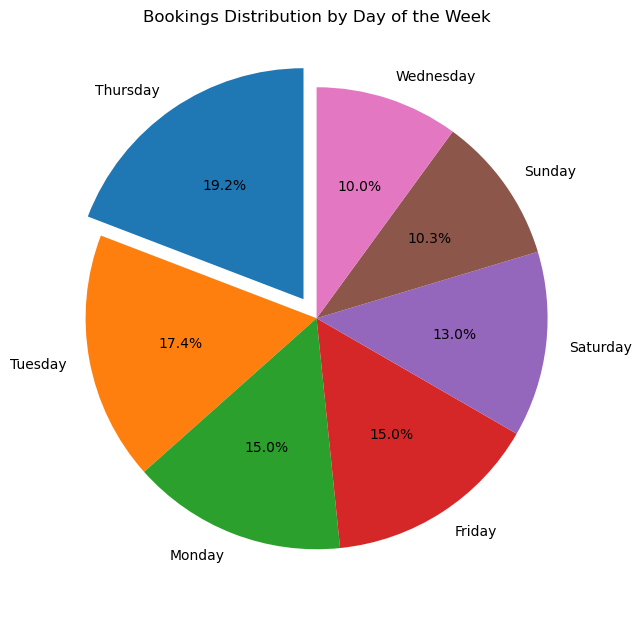

In [16]:
# A slight focus is made on projecting the day of the week with the highest number of bookings
explode = [0 if day != 'Thursday' else 0.1 for day in daily_bookings_count.index]
plt.figure(figsize=(7.5, 7.5))
plt.pie(daily_bookings_count, labels=daily_bookings_count.index, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Bookings Distribution by Day of the Week')
plt.show()

### Q4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [18]:
# Group bookings by service_name and calculate total bookings and total gross booking value
service_stats = bookings.groupby('service_name').agg({'booking_id': 'count', 'INR_Amount': 'sum'})

# Rename the columns for clarity
service_stats.columns = ['Total Bookings', 'Total Gross Booking Value (INR)']

# Print the results
print("Service Name\t\tTotal Bookings\tTotal Gross Booking Value (INR)")
print("-" * 65)
for index, row in service_stats.iterrows():
    total_bookings = int(row['Total Bookings'])
    total_gross_booking_value = row['Total Gross Booking Value (INR)']
    print(f"{index}\t\t\t{total_bookings}\t\t{total_gross_booking_value:.2f}")

Service Name		Total Bookings	Total Gross Booking Value (INR)
-----------------------------------------------------------------
GOIBIBO			186		5897637.97
MMT			48		665669.08
YATRA			105		3378702.13


### Q5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [21]:
# Filter bookings for customers with more than one booking
customers_with_multiple_bookings = bookings['customer_id'].value_counts()
customers_with_multiple_bookings = customers_with_multiple_bookings[customers_with_multiple_bookings > 1]
multiple_bookings = bookings[bookings['customer_id'].isin(customers_with_multiple_bookings.index)]

# Group by 'from_city' and 'to_city' and count the number of bookings for each route
route_bookings_count = multiple_bookings.groupby(['from_city', 'to_city']).size().reset_index(name='booking_count')

# Find the route with the highest number of bookings
most_booked_route = route_bookings_count.loc[route_bookings_count['booking_count'].idxmax()]

# Print the result
print("Most booked route for customers with more than one booking:")
print("From:", most_booked_route['from_city'])
print("To:", most_booked_route['to_city'])
print("Number of bookings:", most_booked_route['booking_count'])

Most booked route for customers with more than one booking:
From: Gurgaon
To: Roissy-en-France
Number of bookings: 5


### Q6. Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [24]:
# Filter bookings made in advance and sort by 'days_to_departure' in descending order
advance_bookings = bookings[bookings['days_to_departure'] > 0].sort_values(by='days_to_departure', ascending=False)

# Group by 'from_city' and count the number of advance bookings for each city
departure_city_stats = advance_bookings.groupby('from_city').agg({'booking_id': 'count'})

# Filter out cities with less than 5 departures
departure_city_stats = departure_city_stats[departure_city_stats['booking_id'] >= 5]

# Calculate the average number of advance bookings for each city
departure_city_stats['avg_advance_bookings'] = departure_city_stats['booking_id'] / 5

# Find the top 3 departure cities with the highest average number of advance bookings
top_departure_cities = departure_city_stats.nlargest(3, 'avg_advance_bookings')

# Print the result
print("Top 3 departure cities with the most advance bookings (minimum 5 departures):")
print(top_departure_cities)

Top 3 departure cities with the most advance bookings (minimum 5 departures):
           booking_id  avg_advance_bookings
from_city                                  
Gurgaon           131                  26.2
Mumbai             34                   6.8
Delhi              29                   5.8


### Q7.a. Plot a heatmap displaying correlations of the numerical column

In [28]:
# List of columns with numerical data
numerical_columns = bookings.select_dtypes(include=['float64']).columns
print("Columns with numerical data:")
print(numerical_columns)

Columns with numerical data:
Index(['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km'], dtype='object')


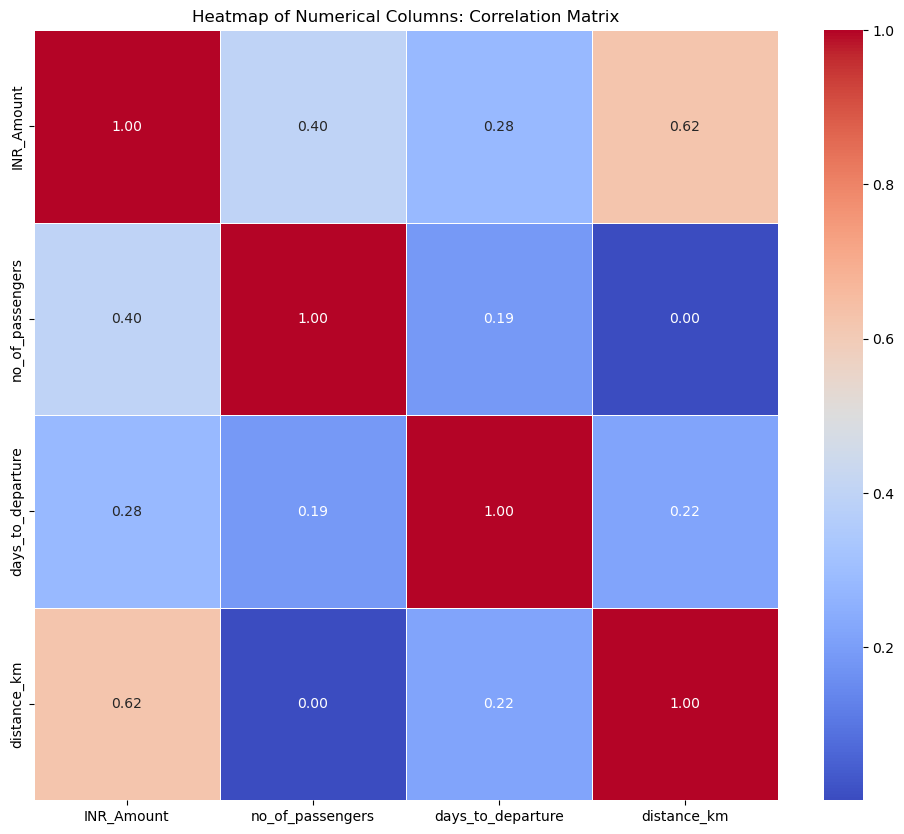

In [35]:
# Calculate the correlation matrix
correlation_matrix = bookings[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Numerical Columns: Correlation Matrix')
plt.show()

### Q7.b. Which pair of numerical columns in the bookings data set, have the maximum correlation?

In [37]:
# We have already calculated the correlation matrix for numerical columns using the code below
# correlation_matrix = bookings[numerical_columns].corr()

# Now, we exclude correlations of a column with itself and find the pair with the maximum correlation
max_correlation = correlation_matrix[correlation_matrix != 1].unstack().idxmax()

# Print the pair of numerical columns with the maximum correlation
print("Pair of numerical columns with the maximum correlation:")
print(max_correlation)

Pair of numerical columns with the maximum correlation:
('INR_Amount', 'distance_km')


### Q8. For each service, which is the most used device type for making bookings on the platform?

In [38]:
# Group bookings by both 'service_name' and 'device_type_used' and count the number of bookings for each combination
device_usage_stats = bookings.groupby(['service_name', 'device_type_used']).size().reset_index(name='count')

# Find the most used device type for each service
most_used_device_per_service = device_usage_stats.sort_values(by=['service_name', 'count'], ascending=[True, False])
most_used_device_per_service = most_used_device_per_service.groupby('service_name').head(1).reset_index(drop=True)

# To index from position 1 (instead of 0), add 1 to the index column
most_used_device_per_service.index = most_used_device_per_service.index + 1

# Print the result
print("Most used device type for making bookings on the platform for each service:")
print(most_used_device_per_service)

Most used device type for making bookings on the platform for each service:
  service_name device_type_used  count
1      GOIBIBO              IOS     70
2          MMT          Desktop     30
3        YATRA          Desktop     51


### Q9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

<Figure size 1200x600 with 0 Axes>

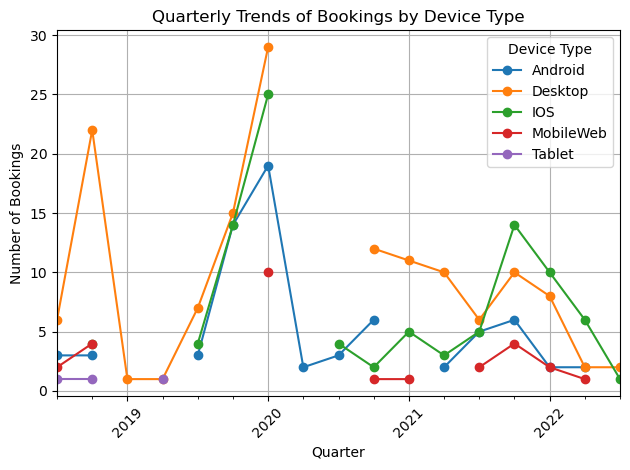

In [43]:
# Convert 'booking_time' to datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Set 'booking_time' as the index
bookings.set_index('booking_time', inplace=True)

# Resample the data to quarterly frequency and count the number of bookings for each device type
quarterly_device_bookings = bookings.groupby([pd.Grouper(freq='Q'), 'device_type_used']).size().unstack()

# Plot the trends for each device type
plt.figure(figsize=(12, 6))
quarterly_device_bookings.plot(marker='o')
plt.title('Quarterly Trends of Bookings by Device Type')
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Consider the following example:

#### 12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total.
#### Searches = 100, bookings = 10, and customers = 12
#### The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:

#### Q10.a. What is the average oBSR for each month of the year?

In [54]:
bookings.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,day_of_week,booking_month
booking_time,,,,,,,,,,,,,,
2020-02-05 16:12:08+00:00,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,Desktop,2565.28,MMT,1.0,10.0,747.8,Wednesday,2
2018-11-21 08:21:47+00:00,customer_303,booking_156,Delhi,India,Brussels,Belgium,Android,23120.00,YATRA,1.0,1.0,6701.5,Wednesday,11
2019-12-16 22:54:58+00:00,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,Android,25717.60,YATRA,1.0,32.0,7712.0,Monday,12
2021-10-29 12:25:38+00:00,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,Friday,10
2020-08-11 16:09:10+00:00,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,Tuesday,8


In [58]:
sessions.head()

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21 21:35:38.910000+00:00,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21 21:37:37.697000+00:00,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21 21:36:11.392000+00:00,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21 21:16:07.685000+00:00,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21 21:34:55.673000+00:00,2020-01-21T21:10:12Z,NaN


In [59]:
# Convert 'search_time' column to datetime data type
sessions['search_time'] = pd.to_datetime(sessions['search_time'])

In [60]:
import calendar

# Extract month from 'booking_time' column
bookings['booking_month'] = bookings.index.month

# Calculate total bookings for each month
total_bookings_per_month = bookings.groupby('booking_month').size()

# Calculate total searches for each month
total_searches_per_month = sessions['search_time'].dt.month.value_counts()

# Calculate the ratio of bookings to searches for each month
obsr_per_month = total_bookings_per_month / total_searches_per_month

# Convert numerical month to month names
month_names = [calendar.month_name[i] for i in range(1, 13)]
obsr_per_month.index = month_names

# Print the result
print("Booking to search ratio for each month:")
print(obsr_per_month)

Booking to search ratio for each month:
January      0.232227
February     0.282486
March        0.228571
April        0.275000
May          0.181818
June         0.393939
July         0.150000
August       0.266667
September    0.373626
October      0.151420
November     0.215470
December     0.226131
dtype: float64


### Q10.b. What is the average oBSR for each day of the week?

In [65]:
# Extract day of the week from 'search_time'
sessions['search_day_of_week'] = sessions['search_time'].dt.day_name()

# Calculate total searches for each day of the week
total_searches_per_day = sessions.groupby('search_day_of_week').size()

# Calculate total bookings for each day of the week
total_bookings_per_day = bookings.groupby('day_of_week').size()

# Calculate the average oBSR for each day of the week
average_obsr_per_day = total_searches_per_day / total_bookings_per_day

# Reorder the average_obsr_per_day Series to start from Monday
average_obsr_per_day = average_obsr_per_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Print the result
print("Average oBSR for each day of the week (Monday to Sunday):")
print(average_obsr_per_day)

Average oBSR for each day of the week (Monday to Sunday):
search_day_of_week
Monday       4.980392
Tuesday      3.694915
Wednesday    6.382353
Thursday     4.492308
Friday       3.980392
Saturday     4.545455
Sunday       3.228571
dtype: float64


### Q10.c. Plot a time series of oBSR on all the given dates.

In [75]:
# Check column names
print("Column names in bookings DataFrame:", bookings.columns)

Column names in bookings DataFrame: Index(['customer_id', 'booking_id', 'from_city', 'from_country', 'to_city',
       'to_country', 'device_type_used', 'INR_Amount', 'service_name',
       'no_of_passengers', 'days_to_departure', 'distance_km', 'day_of_week',
       'booking_month'],
      dtype='object')


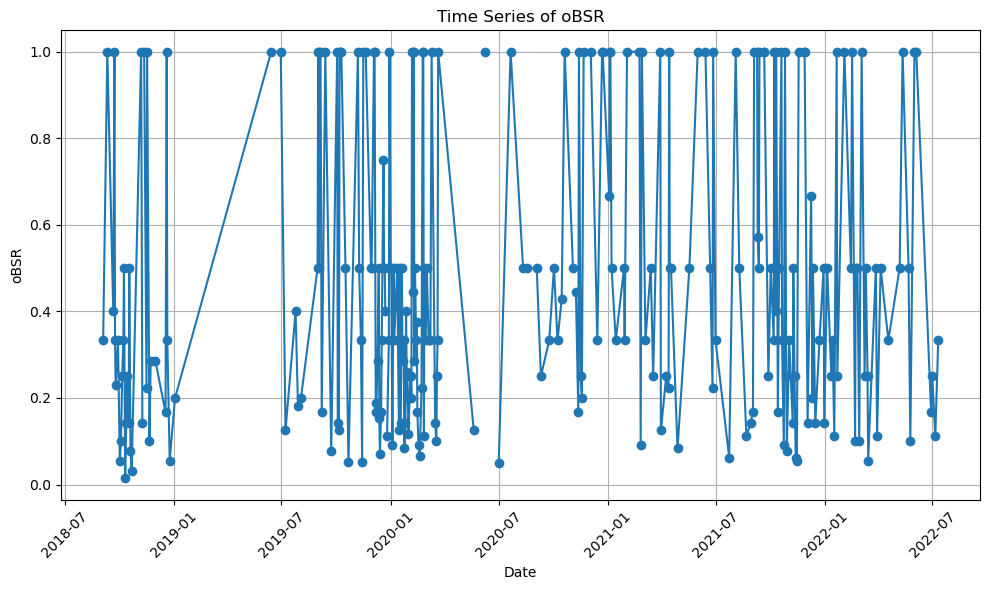

In [78]:
# Check if the DataFrame is already indexed by booking time
if isinstance(bookings.index, pd.DatetimeIndex):
    # Use the index as the booking time
    bookings['booking_date'] = bookings.index.date
else:
    print("The DataFrame is not indexed by booking time. Please make sure to index the DataFrame by booking time.")

# Extract the date from the 'search_time' column
sessions['search_date'] = pd.to_datetime(sessions['search_time']).dt.date

# Calculate the total number of searches and bookings for each date
total_searches_per_date = sessions.groupby('search_date').size()
total_bookings_per_date = bookings.groupby('booking_date').size()

# Calculate the overall booking to search ratio (oBSR) for each date
obsr_per_date = total_bookings_per_date / total_searches_per_date

# Plot the time series of oBSR
plt.figure(figsize=(10, 6))
obsr_per_date.plot(marker='o', linestyle='-')
plt.title('Time Series of oBSR')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()